# Use Auto Arima to Predict Revenue

In this project, I created a Python notebook for predicting financial revenue of Bank using Auto Arima statistical method for time series forecasting as we take into account the past values to predict the future values of our bank revenues.

- p (past values used for forecasting the next value)

- q (past forecast errors used to predict the future values)

- d (order of differencing)


## Understanding the Problem Statement

Our focus is to do the technical analysis by analyzing the company’s future profitability on the basis of its current business financial performance by reading the charts and using statistical figures to identify the trends. 



## Data Sources:
* revenue_2009_2016.csv :  Processed data as an output from the data-preparation. Notebook available [here.](https://github.com/CFerraren/PyBank/blob/master/1-Data_Prep.ipynb)




### Task is to create a Python script that analyzes the records to calculate each of the following:

- Use auto ARIMA which automatically selects the best combination of (p,q,d) that provides the least error. 

- Split our data into train and validation sets to verify our predictions.


- Plot results.

### Changes:

- 02-12-2018: Started the project

- 12-11-2018: Updated the project using Python Pandas and added visualization using matplotlib, Tableau, and Univariate Linear Regression Machine learning to predict future bank revenue.


---

In [1]:
#import packages
import numpy as np
import pandas as pd
import os

In [2]:
#to plot within the notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [4]:
#use seaborn to prettify the plots
import seaborn as sns
sns.set_style('whitegrid')

In [5]:
#display pd typeformat
pd.set_option('display.float_format', '{:,.0f}'.format)

In [6]:
#directory and filename
dir = 'data/processed/'
file = 'revenue_2009_2016.csv'

In [7]:
#load csv into dataframe and print the head
#parse the date colum to datetime format
#set 'Date' column to index
df = pd.read_csv(os.path.join(dir, file), parse_dates=['Date'])
df[:5]

,Date,Revenue
0,2009-01-01,"943,690"
1,2009-02-01,"1,062,565"
2,2009-03-01,"210,079"
3,2009-04-01,"-735,286"
4,2009-05-01,"842,933"


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Revenue,86,"650,527","680,460","-1,063,151","279,551","686,900","1,118,162","2,211,086"


In [9]:
#make a copy
data = df.copy()
data.set_index('Date', inplace=True)

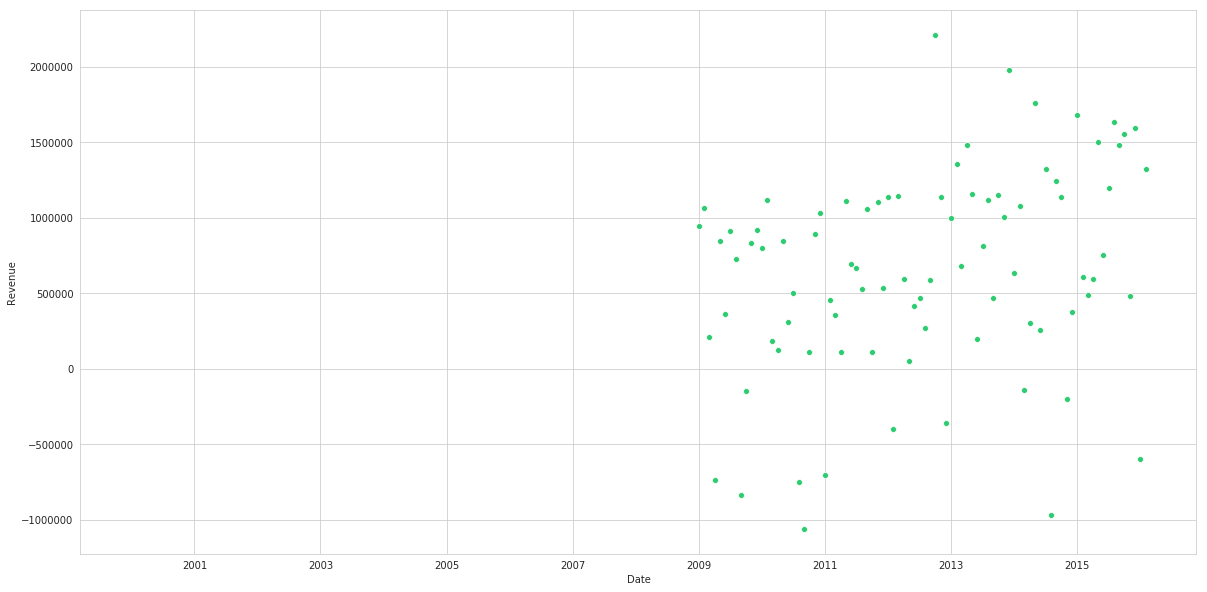

In [10]:
ax = sns.scatterplot(x=data.index, y='Revenue',  data=data, color='#2ecc71',)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


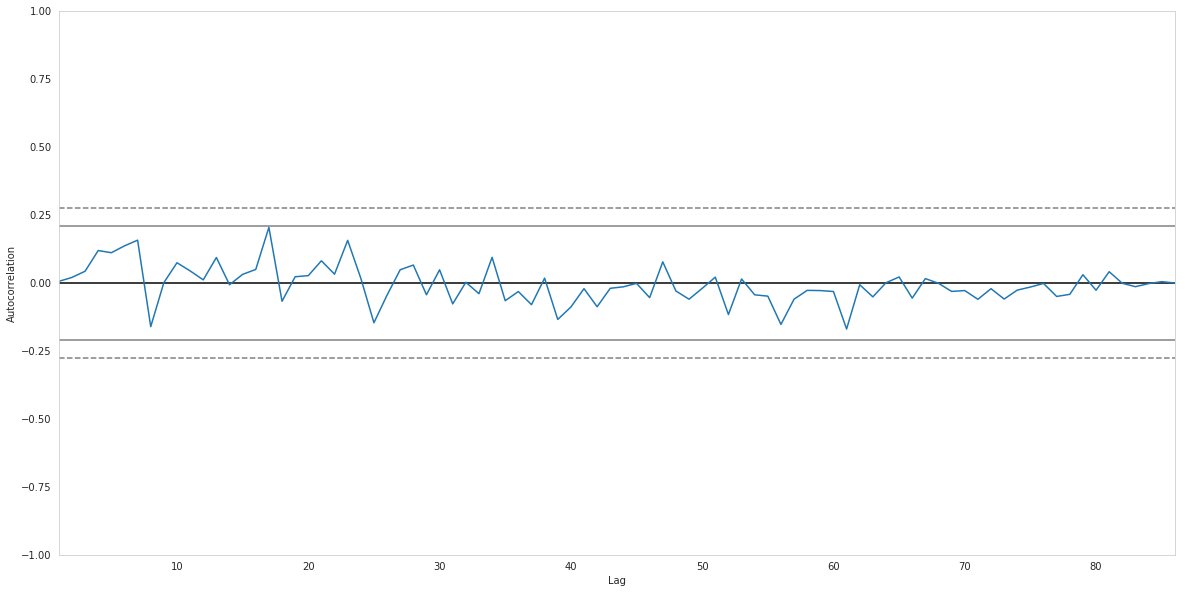

In [11]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(data)
plt.show()

In [12]:
#split into train and validation
train = data[:72]
valid = data[72:]

In [16]:
#assign the feature and target
training = train['Revenue']
validation = valid['Revenue']

In [17]:
#importing libraries
from pyramid.arima import auto_arima

/usr/local/lib/python3.6/dist-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)


In [18]:
#create model
model = auto_arima(training, start_p=1, start_q=1,max_p=3, 
                   max_q=3, m=12,start_P=0, seasonal=True,d=1, 
                   D=1, trace=True,error_action='ignore',
                   suppress_warnings=True)

model.fit(training)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1830.808, BIC=1834.963, Fit time=0.026 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1808.413, BIC=1816.724, Fit time=0.087 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1790.925, BIC=1799.236, Fit time=0.106 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1791.709, BIC=1802.097, Fit time=0.304 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1800.701, BIC=1806.933, Fit time=0.025 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=1814.402, BIC=1820.635, Fit time=0.071 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=nan

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 1, 2),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [19]:
#forecast
forecast = model.predict(n_periods=valid.shape[0])

In [20]:
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

### Results

In [21]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Revenue'])-np.array(forecast['Prediction'])),2)))
rms

1559632.923302141

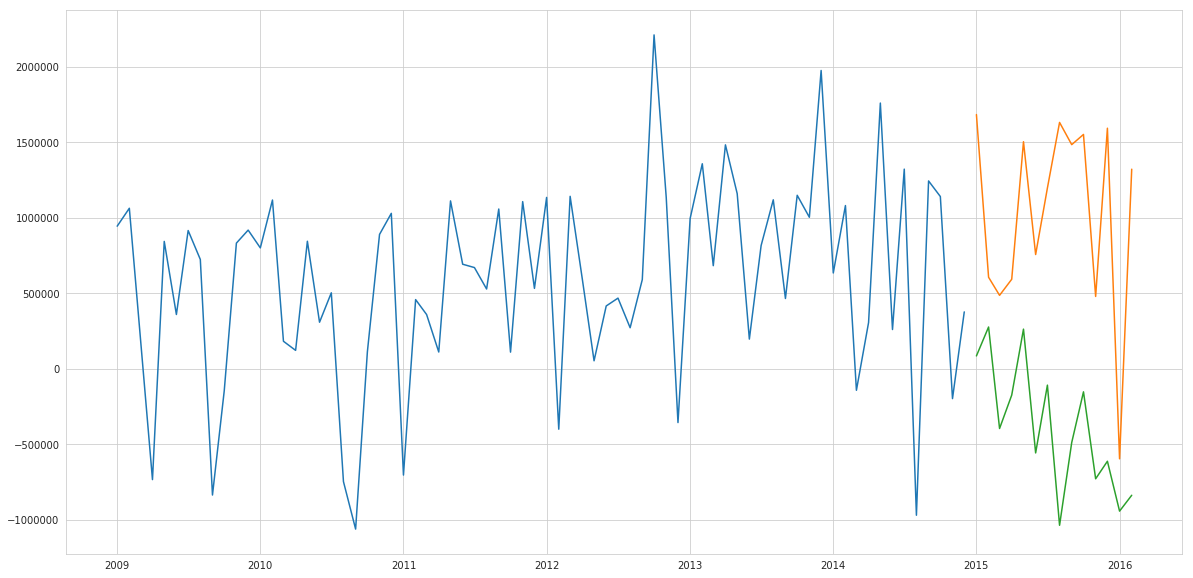

In [22]:
#plot
plt.plot(train['Revenue'])
plt.plot(valid['Revenue'])
plt.plot(forecast['Prediction'])